In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [21]:
class DBSCAN:
    def __init__(self,eps:float,minPts:int) -> None:
        super().__init__()
        self.eps=eps
        self.minPts=minPts
        
    #Function to find index of neighbors of a point. All points whose distances are lower than eps from the given point are neighbors
    def _findNeighbors(self,data,coreCandiIndex):
        neighbour=[]
        for pointIdx in range(len(data)):
            if (np.linalg.norm(data.iloc[pointIdx]-data.iloc[coreCandiIndex]))<=self.eps:
                neighbour.append(pointIdx)
        return neighbour

    #Function to check if points are density connected or not and then assign them the same cluster labels
    def _createCluster(self,data,neighbours,coreCandiIndex,labels,clusterLabel):
        labels[coreCandiIndex]=clusterLabel
        i=0
        while i < len(neighbours):
            pointIdx=neighbours[i]
            if (labels[pointIdx]==-1):
                labels[pointIdx]=clusterLabel
            elif (labels[pointIdx]==0):
                labels[pointIdx]=clusterLabel
                pointNeighbours=self._findNeighbors(data,pointIdx)
                if (len(pointNeighbours)>=self.minPts):
                    neighbours=neighbours+pointNeighbours
            i+=1

    #Fit method
    def fit(self,data):
        labels=[0]*len(data)
        clusterLabel=0
        for i in range(len(data)):
            if (labels[i]!=0):
                continue
            neighbour=self._findNeighbors(data,i)
            if (len(neighbour)<self.minPts):
                labels[i]= -1
            else:
                clusterLabel+=1
                self._createCluster(data,neighbour,i,labels,clusterLabel)
        return labels

    #Plot method for our dbscan clustered data
    def plotClusters(self,df,labels):
        plt.figure(figsize=(10,10))
        plt.scatter(df[0],df[1],c=labels)
        plt.title('DBSCAN Clustering',fontsize=20)
        plt.xlabel('Feature 1',fontsize=14)
        plt.ylabel('Feature 2',fontsize=14)
        plt.show()

    #Curve to find out efficient eps vlue
    def optimizationCurve(self,df):
        neigh = NearestNeighbors(n_neighbors=self.minPts)
        nbrs = neigh.fit(df[[0,1]])
        distances, indices = nbrs.kneighbors(df[[0,1]])
        distances = np.sort(distances, axis=0)
        distances = distances[:,1]
        plt.figure(figsize=(10,10))
        plt.plot(distances)
        plt.title('K-distance Graph',fontsize=20)
        plt.xlabel('Data Points sorted by distance',fontsize=14)
        plt.ylabel('Epsilon',fontsize=14)
        plt.show()

In [3]:
import math
np.random.seed(0)
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [4]:
# Creating data points in the form of a circle
df1=pd.DataFrame(PointsInCircum(500,1000))
df2=pd.DataFrame(PointsInCircum(300,700))
df3=pd.DataFrame(PointsInCircum(100,300))
df4=pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df=pd.concat([df1,df2,df3,df4],axis=0)

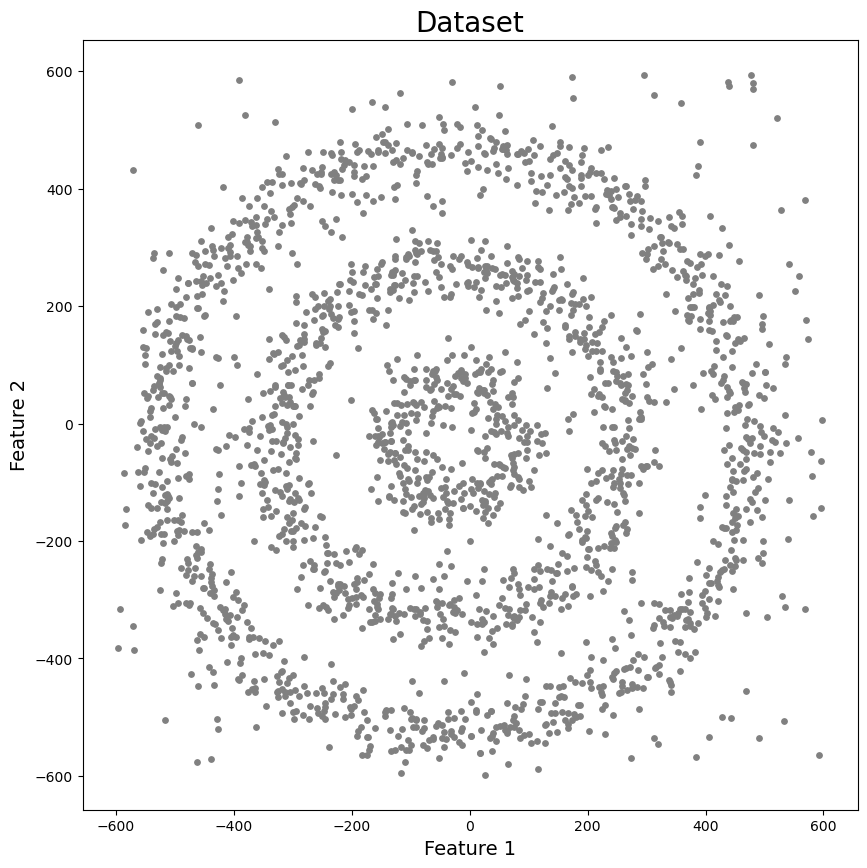

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [6]:
db=DBSCAN(30.0,6)
labels=db.fit(df)
df['DBSCAN_opt_labels']=labels
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 1    1049
 2     736
 4     312
-1     199
 3       4
Name: count, dtype: int64

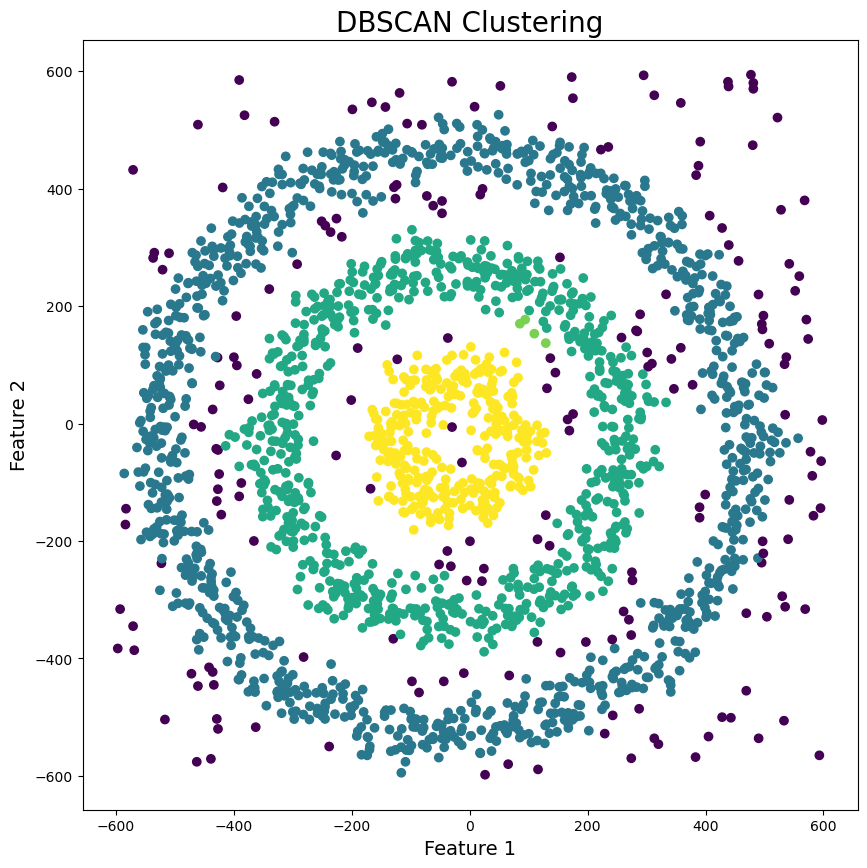

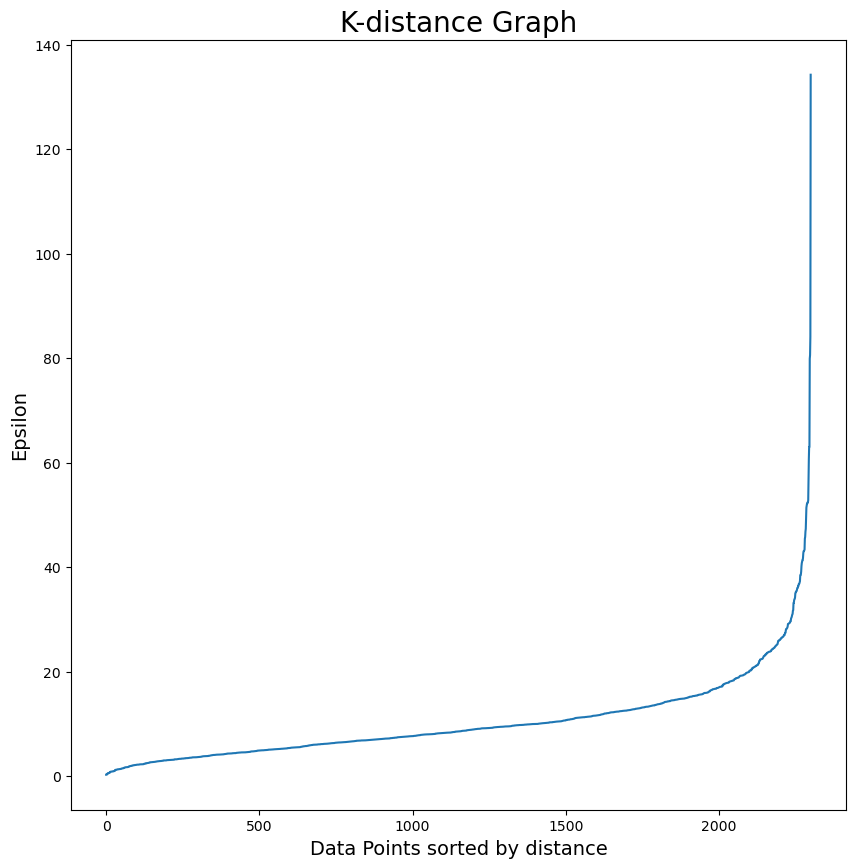

In [7]:
db.plotClusters(df,labels)
db.optimizationCurve(df)

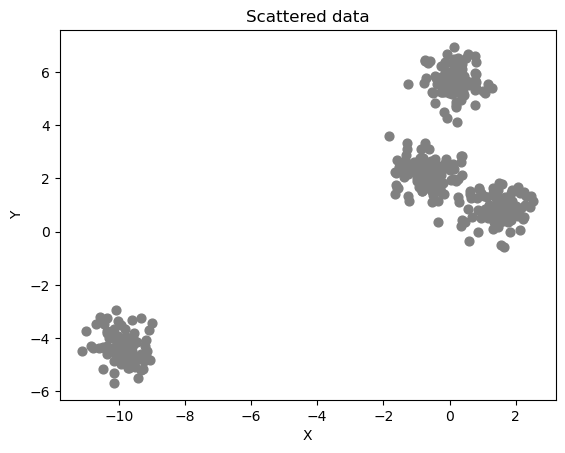

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 400, centers = 4, 
               cluster_std = 0.5, n_features = 2)

plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'grey')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scattered data")
plt.show()
X=pd.DataFrame(X)

In [17]:
db=DBSCAN(0.25,6)
label2=db.fit(X)
X['labels']=label2
X['labels'].value_counts()

labels
-1    121
 1     74
 3     70
 2     69
 4     66
Name: count, dtype: int64

In [18]:
X=pd.DataFrame(X)
X['labels']=label2
len(X['labels'].unique())

5

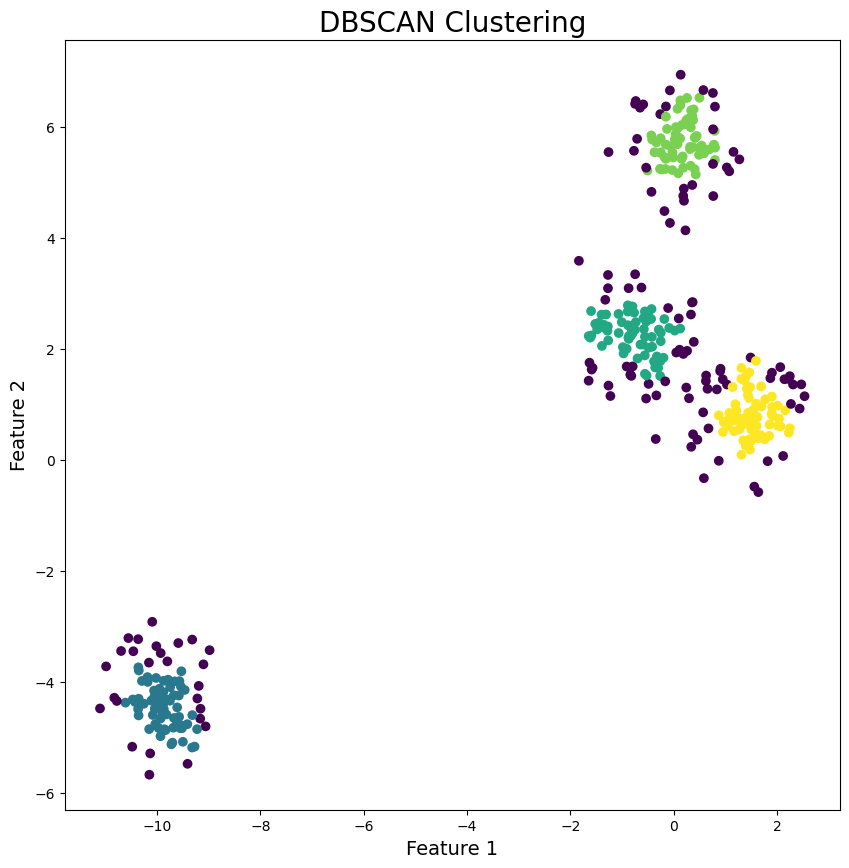

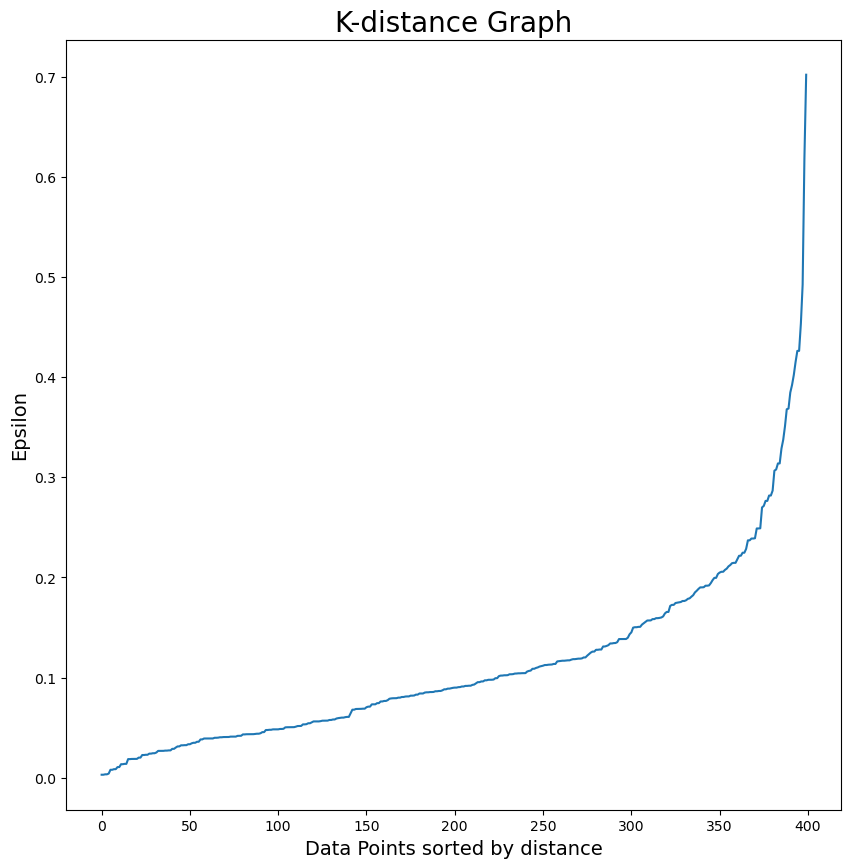

In [19]:
db.plotClusters(X,label2)
db.optimizationCurve(X)

In [20]:
l=[1,2,3,4]
i=0
while i < len(l):
    print(l[i])
    if (i==3):
        l=l+[6,7,8]
    i+=1

1
2
3
4
6
7
8
